# Python Tutorial on Topological Data Analysis

## Elizabeth Munch
 Dept of Computational Mathematics, Science and Engineering
 Dept of Mathematics
 Michigan State University

# Welcome

This notebook is meant to be a first step introduction to some available tools for computation of TDA signatures using python.  This repository includes the jupyter notebooks for the 2021 Workshop ["Mathematical and Computational Methods for Complex Social Systems"](https://www.google.com/url?q=https://meetings.ams.org/math/sc2021/meetingapp.cgi) to be held at the virtual JMM 2021, led by [Elizabeth Munch](http://elizabethmunch.com/). This introduction is tailored for a network science audience, so the focus is on an relevant tools when given a network input.

These slides are written to be presented as [RISE slides](https://rise.readthedocs.io/en/stable/index.html), however the notebook should be self contained without needing this installed. If you see a lot of weird cell toolbars in the notebook (which are used for controlling the slideshow version), these can be removed from your view of the jupyter notebook by going to View -> Cell Toolbar -> None













# Goals

- Give a brief overview of available packages
- Provide pipelines for computing persistent homology for input data such as a discrete metric space and a weighted graph. 
- Give you a place to start....




# Things I won't get to

- Every possible filtration
- Graphical signatures of data
  - Reeb graphs
  - Mapper graphs 
  - Merge trees
  - Contour trees

# Options to follow along



- Download from the github repo: [github.com/lizliz/TDA-Python-Workshop-JMM21](https://github.com/lizliz/TDA-Python-Workshop-JMM21)
- Run directly from binder: [tinyurl.com/jmm-tda](https://tinyurl.com/jmm-tda)



# An incomplete list of available software

There are so many.....


New packages are being developed incredibly quickly.  I'm so happy to see the field taking off so fast.  That being said, I am choosing to use some of the packages I am most familiar with, which does not mean they will be the best option for your task. An incomplete and almost immeidately outdated list of available options is below. Any ommissions are uninentional. 

- [SciKitTDA](https://scikit-tda.org/) by Nataniel Saul and Chris Tralie
- [GUDHI](https://github.com/GUDHI/) developed at INRIA


- [Teaspoon](http://elizabethmunch.com/code/teaspoon/index.html) By Liz Munch and Firas Khasawneh


- [Ripser](https://github.com/Ripser/ripser) by Ulrich Bauer (C++)
- [Giotto-tda](https://giotto-ai.github.io/) developted at EPFL
- [Cubicle](https://bitbucket.org/hubwag/cubicle/src/master/) by Hubert Wagner
- [HomcCube](https://i-obayashi.info/software.html) By Ippei Obayashi.
- [DIPHA](https://github.com/DIPHA/dipha) by Ulrich Bauer and Michael Kerber
- [diamorse](https://github.com/AppliedMathematicsANU/diamorse) developed at The Australian National University.
- [Perseus](http://people.maths.ox.ac.uk/nanda/perseus/) by Vidit Nanda
- [Dionysus2](https://www.mrzv.org/software/dionysus2/) by Dimitry Morozov (C++, Python)
- [CliqueTop](https://github.com/nebneuron/clique-top) by Chad Giusti (Matlab)
- [Eirene](http://gregoryhenselman.org/eirene/index.html) by Greg Henselman (Julia)
- [Ripser-live](http://live.ripser.org/)  by Ulrich Bauer (browser)
- [CHomP](https://github.com/shaunharker/CHomP") by Shaun Harker (C++) 
- [Hera](https://bitbucket.org/grey_narn/hera) by Michael Kerber, Dmitriy Morozov, and Arnur Nigmetov
- [JavaPlex](https://github.com/appliedtopology) by Andrew Tausz, Mikael Vejdemo-Johansson and Henry Adams
- [PHAT](https://bitbucket.org/phat-code/phat) by Ulrich Bauer, Michael Kerber, Jan Reininghaus, Hubert Wagner, and Bryn Keller
-    <a href="https://topology-tool-kit.github.io/" target="_blank">Topology ToolKit</a>&nbsp;(C++) by&nbsp;Julien Tierny, Guillaume Favelier, Joshua Levine, Charles Gueunet, and Micha&euml;l Michaux (I think?)
-   <a href="https://cran.r-project.org/web/packages/TDA/index.html" target="_blank">TDA</a>&nbsp;(R)&nbsp;by&nbsp;Brittany T. Fasy, Jisu Kim, Fabrizio Lecci, and Cl&eacute;ment Maria
-    <a href="https://github.com/paultpearson/TDAmapper" target="_blank">TDAMapper </a>(R) by&nbsp;Paul Pearson, Daniel M&uuml;ellner, and Gurjeet Singh
-    <a href="https://people.clas.ufl.edu/peterbubenik/intro-to-tda/" target="_blank">R scripts for TDA</a>&nbsp;by Peter Bubenik
-    <a href="https://github.com/nebneuron/Simplicial" target="_blank">Simplicial complexes for Julia</a> by Alex Kunin and Vladimir Itskov
-    <a href="http://web.cse.ohio-state.edu/~dey.8/SimBa/Simba.html" target="_blank">SimBa</a>&nbsp;and&nbsp;<a href="http://web.cse.ohio-state.edu/~dey.8/SimPers/Simpers.html" target="_blank">SimPer</a>&nbsp;(C++) by&nbsp;Tamal K Dey, &nbsp;Fengtao Fan, &nbsp;Dayu Shi, &nbsp;and Yusu Wan&nbsp;
- <a href="http://danifold.net/mapper/index.html" target="_blank">Python Mapper</a>&nbsp;(Python) by&nbsp;Daniel M&uuml;llner and Aravindakshan Babu
-    <a href="https://www.math.upenn.edu/~dlotko/persistenceLandscape.html" target="_blank">Persistence Landscape Toolbox</a>&nbsp;(C++) by Pawel Dlotko&#8203;
    

---

---

In [4]:
# Basic imports 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import networkx as nx
from IPython.display import Video

# scikit-tda imports..... Install all with -> pip install scikit-tda
#--- this is the main persistence computation workhorse
import ripser
# from persim import plot_diagrams
import persim
# import persim.plot

# teaspoon imports...... Install with -> pip install teaspoon
#---these are for generating data and some drawing tools 
import teaspoon.MakeData.PointCloud as makePtCloud
import teaspoon.TDA.Draw as Draw

#---these are for generating time series network examples
from teaspoon.SP.network import ordinal_partition_graph
from teaspoon.TDA.PHN import PH_network
from teaspoon.SP.network_tools import make_network
from teaspoon.parameter_selection.MsPE import MsPE_tau
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL


# Computing persistence on a point cloud



Basic version: point clouds in $\mathbb{R}^n$ inheriting Euclidean metric

## Annulus example

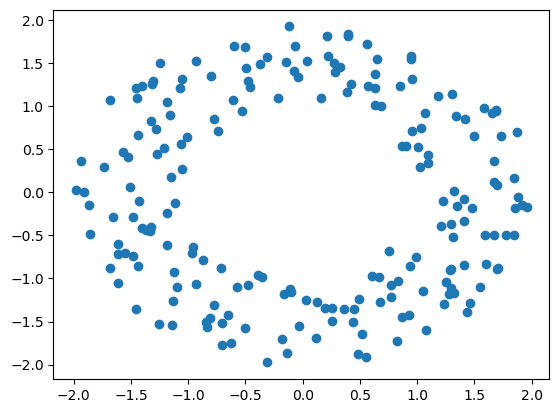

In [5]:
r = 1
R = 2
P = makePtCloud.Annulus(N=200, r=r, R=R, seed=None) # teaspoon data generation
plt.scatter(P[:,0],P[:,1])
# print(P)
# print(type(P))
# print(P.shape)

.... run me for some nice drawings in a bit ....

In [6]:
# Some quick code to draw stuff without showing all the matplotlib junk in the slides everytime. 

def drawTDAtutorial(P,diagrams, R = 2):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20,5))

    # Draw point cloud 
    plt.sca(axes[0])
    plt.title('Point Cloud')
    plt.scatter(P[:,0],P[:,1])

    # Draw diagrams
    plt.sca(axes[1])
    plt.title('0-dim Diagram')
    Draw.drawDgm(diagrams[0])

    plt.sca(axes[2])
    plt.title('1-dim Diagram')
    Draw.drawDgm(diagrams[1])
    plt.axis([0,R,0,R])

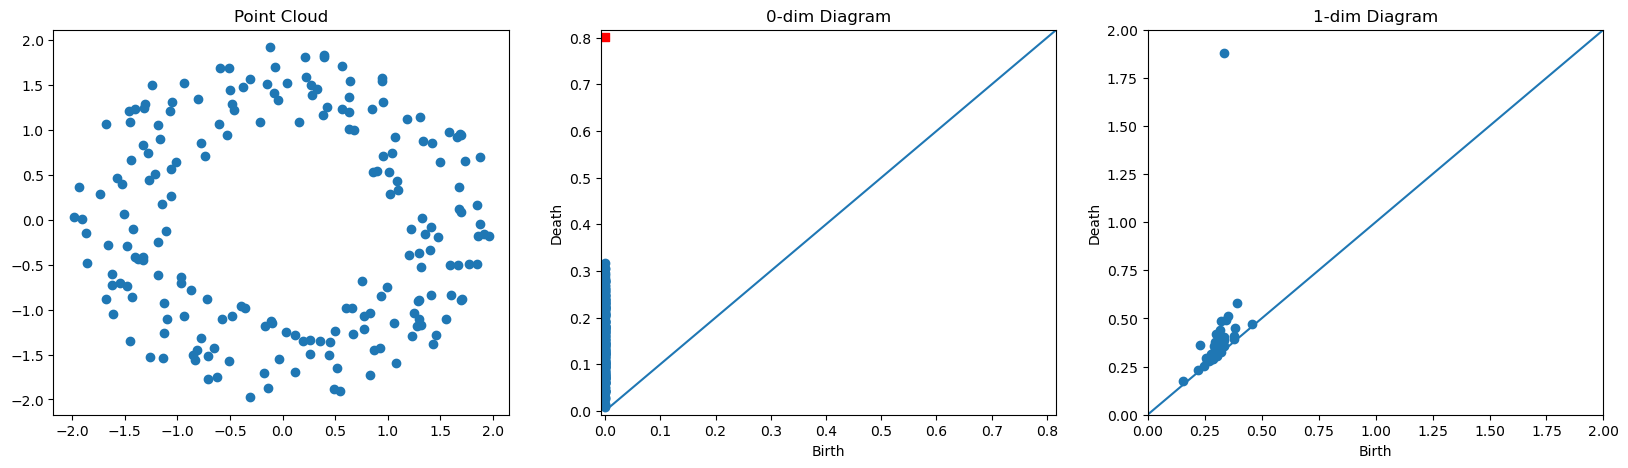

In [7]:
diagrams = ripser.ripser(P)['dgms']

# Draw stuff
drawTDAtutorial(P,diagrams)  # Script included in notebook for drawing

### Storage of diagrams

In [8]:
# Some discussion of how diagrams are stored 
data = ripser.ripser(P)
# print(data.keys())
# print(data['dgms'])
data['dgms'][1]
# len(data['dgms'])

array([[0.45801112, 0.46995404],
       [0.39073011, 0.58151656],
       [0.3843824 , 0.44876006],
       [0.38040257, 0.39326391],
       [0.37724876, 0.40963235],
       [0.35104874, 0.51426756],
       [0.3448627 , 0.49261796],
       [0.33525389, 0.35710487],
       [0.33483168, 0.40441737],
       [0.3345322 , 0.38709423],
       [0.33367172, 1.87741184],
       [0.33124709, 0.35503203],
       [0.32885933, 0.37776509],
       [0.3237862 , 0.48829654],
       [0.32108328, 0.32804725],
       [0.31841516, 0.35163763],
       [0.3168163 , 0.44148198],
       [0.3157168 , 0.40480015],
       [0.30524999, 0.30933401],
       [0.30352476, 0.30728677],
       [0.30134195, 0.36389396],
       [0.29929927, 0.41861308],
       [0.2944698 , 0.37542725],
       [0.29148138, 0.35905701],
       [0.28608456, 0.29145038],
       [0.2848672 , 0.32003564],
       [0.2843174 , 0.29009569],
       [0.28304979, 0.30107915],
       [0.27888948, 0.31536308],
       [0.27041179, 0.28093863],
       [0.

### Cube example

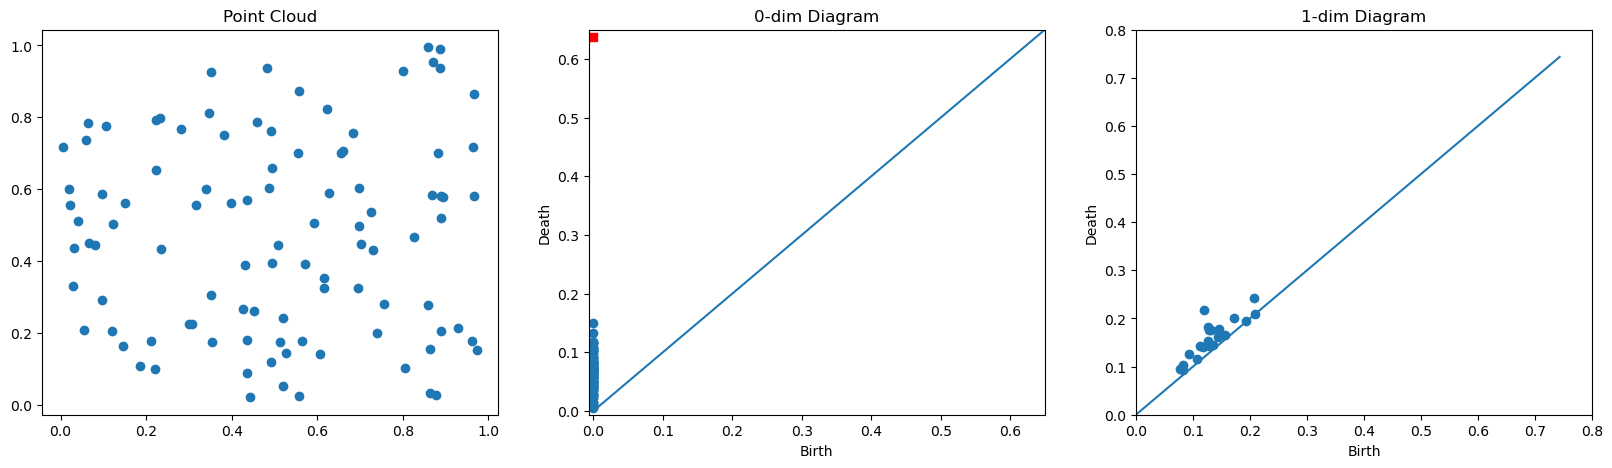

In [9]:
P = makePtCloud.Cube()
diagrams = ripser.ripser(P)['dgms']

# Draw stuff
drawTDAtutorial(P,diagrams,R=0.8) # Script for drawing everything, code included in notebook


### Double annulus example

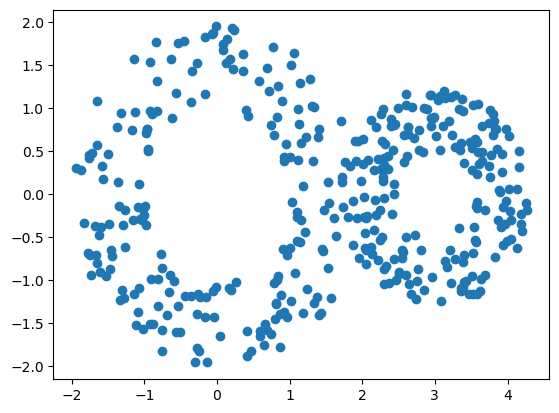

In [10]:
# Make a quick double annulus

def DoubleAnnulus(r1 = 1, R1 = 2, r2 = .8, R2 = 1.3, xshift = 3):
    P = makePtCloud.Annulus(r = r1, R = R1)
    Q = makePtCloud.Annulus(r = r2, R = R2)
    Q[:,0] = Q[:,0] + xshift
    P = np.concatenate((P, Q) )
    return(P)

P = DoubleAnnulus(r1 = 1, R1 = 2, r2 = .5, R2 = 1.3, xshift = 3) 
plt.scatter(P[:,0], P[:,1])

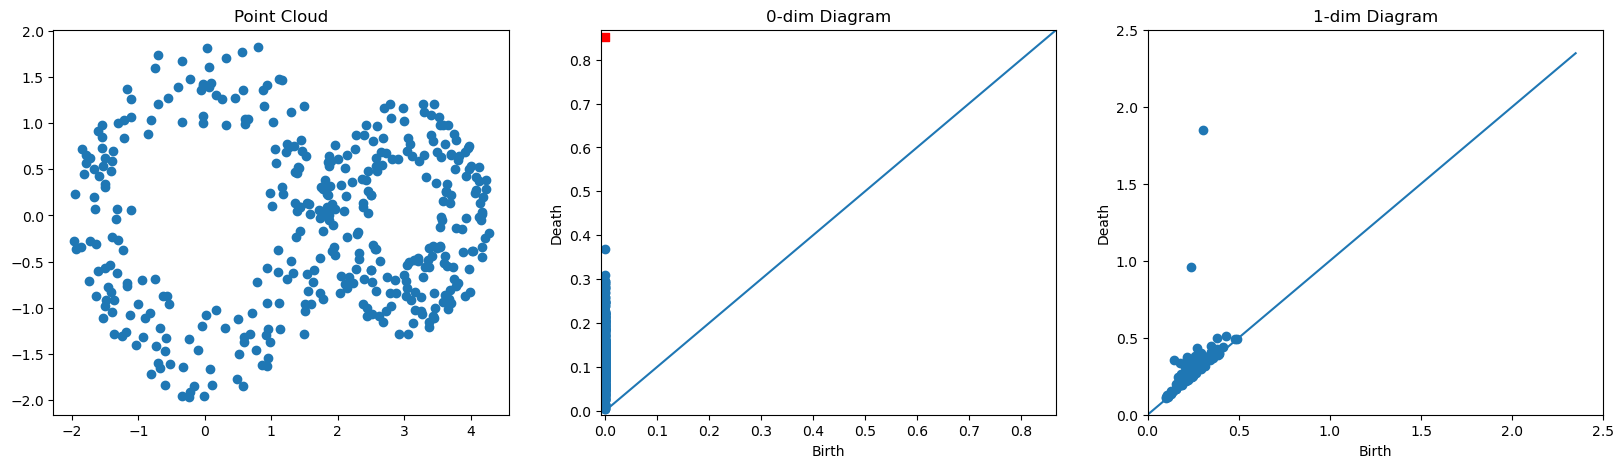

In [11]:
P = DoubleAnnulus(r1 = 1, R1 = 2, r2 = .5, R2 = 1.3, xshift = 3) # Code included in notebook
diagrams = ripser.ripser(P)['dgms']

# Draw stuff
drawTDAtutorial(P,diagrams,R=2.5) # Script for drawing everything, code included in notebook


## Computing Persistence on a Pairwise Distance/Similarity Matrix 

For this tutorial, we will always use the clique complex, but there are other options available.

Some examples of when we might want to compute persistence in this way:

- Input data with a distance/similarity matrix
- Weighted graph where we set distance between non adjacent vertices to be np.inf- 

### Computing persistence for a weighted graph as the 1-skeleton

-Given a weighted graph $G$, get a filtration by keeping all edges with value $\leq a$, then computing the clique complex.

-Most useful/interesting when we have a decently dense graph

### An overly simple example

Given a pairwise similarity matrix $D$.

Build the clique complex of the filtration induced by including edges in increasing order of weight.

<img src="figures/WeightedGraphCliqueExample.png" alt="Simple example" style="width:500px">

<img src="figures/WeightedGraphCliqueExample.png" alt="Simple example" style="width:300px">

In [12]:
# Generate the distance matrix from the previous example
D = np.array([[0, 1, np.inf, np.inf, 6],  [0, 0, 5, np.inf, np.inf],  [0, 0, 0, 2, 4],  [0, 0, 0, 0, 3],  [0, 0, 0, 0, 0]])
D = D+D.T
print(D)


[[ 0.  1. inf inf  6.]
 [ 1.  0.  5. inf inf]
 [inf  5.  0.  2.  4.]
 [inf inf  2.  0.  3.]
 [ 6. inf  4.  3.  0.]]


Compute the persistence diagram, the key here is the `distance_matrix=True` bit since otherwise, ripser would think that `D` is a point cloud of $n$ $n$-dimensional points

In [13]:
diagrams = ripser.ripser(D, distance_matrix=True, maxdim=1)['dgms']
print('0-Dim Diagram')
print(diagrams[0])
print('1-Dim Diagram')
print(diagrams[1])

0-Dim Diagram
[[ 0.  1.]
 [ 0.  2.]
 [ 0.  3.]
 [ 0.  5.]
 [ 0. inf]]
1-Dim Diagram
[[ 6. inf]]


### A bigger example with an Erdos-Renyii random graph

... run me for drawing nicely later ....

In [14]:
# Drawing script for weighted graph
def drawGraphEx(G):
    #draw it!

    pos = nx.spring_layout(G)  # positions for all nodes - seed for reproducibility

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=70)

    # edges
    nx.draw_networkx_edges(G, pos,  width=2)
    # nx.draw_networkx_edges(
    #     G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
    # )

    # labels
    # nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
    edge_labels=nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G, 'weight'))

There are 14 edges.


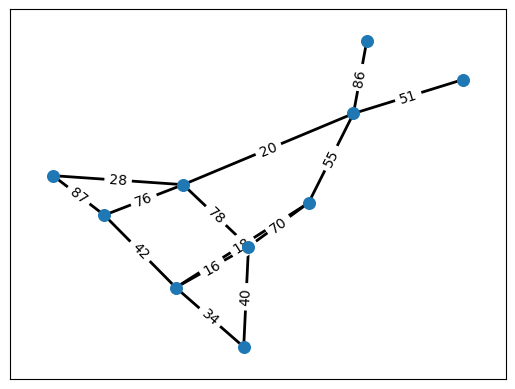

In [15]:
n = 10
p = .3

# Generate random graph 
G = nx.erdos_renyi_graph(n, p, seed=None, directed=False)

m = len(G.edges)
print('There are', m,'edges.')

# Generate random edge weights in the interval [0,maxWeight]
maxWeight = 100
weights = np.random.randint(maxWeight, size = m)

for i, e in enumerate(G.edges()):
    G[e[0]][e[1]] ['weight'] = weights[i]
    
drawGraphEx(G)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18504\1619634408.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, weight = 'weight')


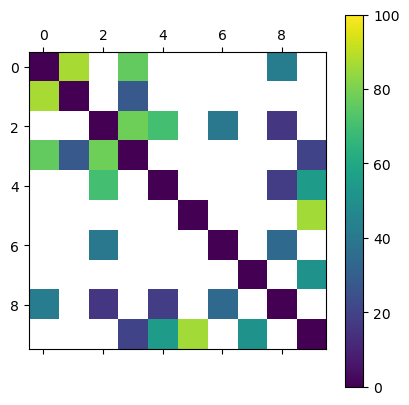

In [16]:
A = nx.adjacency_matrix(G, weight = 'weight')
A = A.todense() # Turn into dense matrix for ease of messing with it
A = np.array(A) # Apparently I need to hand scikit-tda an array instead of a matrix, don't know why
A = A.astype('float64') # Needed to let me put in np.inf
A[ np.where(A == 0)] = np.inf
np.fill_diagonal(A,0)

im = plt.matshow(A, vmax = 100) # Note the np.inf values show up as white
plt.colorbar(im)

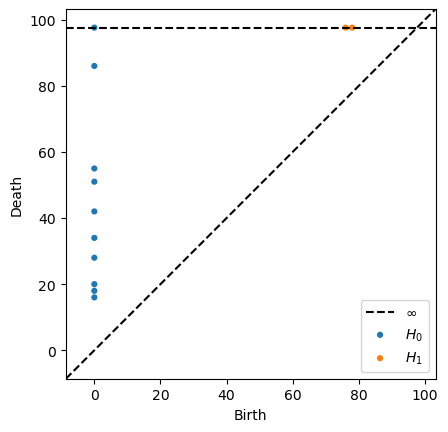

In [17]:
diagrams = ripser.ripser(A, distance_matrix=True)['dgms']
persim.plot_diagrams(diagrams)
# print(diagrams)
# print(diagrams)

### An example from networks computed from time series embeddings 

- [Persistent Homology of Complex Networks for Dynamic State Detection. *Audun Myers, Elizabeth Munch, and Firas A. Khasawneh*. Physical Review E, 2019](https://doi.org/10.1103/PhysRevE.100.022314)

In [18]:
Video("figures/OrdinalPartitionNetworkExample_AudunMyers.mp4", width = 1000)

... run me for drawing stuff later...

In [19]:
# Code to draw the next example later, here so it doesn't end up in a slide
def drawNetworkExample(gs,G,diagram):
    TextSize = 14
    plt.figure(2)
    plt.figure(figsize=(8,8))
    gs = gridspec.GridSpec(4, 2)

    ax = plt.subplot(gs[0:2, 0:2]) #plot time series
    plt.title('Time Series', size = TextSize)
    plt.plot(ts, 'k')
    plt.xticks(size = TextSize)
    plt.yticks(size = TextSize)
    plt.xlabel('$t$', size = TextSize)
    plt.ylabel('$x(t)$', size = TextSize)
    plt.xlim(0,len(ts))

    ax = plt.subplot(gs[2:4, 0])
    plt.title('Network', size = TextSize)
    nx.draw(G, pos, with_labels=False, font_weight='bold', node_color='blue',
            width=1, font_size = 10, node_size = 30)

    ax = plt.subplot(gs[2:4, 1])
    plt.title('Persistence Diagram', size = TextSize)
    MS = 3
    top = max(diagram[1].T[1])
    plt.plot([0,top*1.25],[0,top*1.25],'k--')
    plt.yticks( size = TextSize)
    plt.xticks(size = TextSize)
    plt.xlabel('Birth', size = TextSize)
    plt.ylabel('Death', size = TextSize)
    plt.plot(diagram[1].T[0],diagram[1].T[1] ,'go', markersize = MS+2)
    plt.xlim(0,top*1.25)
    plt.ylim(0,top*1.25)

    plt.subplots_adjust(hspace= 0.8)
    plt.subplots_adjust(wspace= 0.35)
    plt.show()
    
def drawThisDiagram(diagram):
    TextSize = 14
    plt.title('Persistence Diagram', size = TextSize)
    MS = 3
    top = max(diagram[1].T[1])
    plt.plot([0,top*1.25],[0,top*1.25],'k--')
    plt.yticks( size = TextSize)
    plt.xticks(size = TextSize)
    plt.xlabel('Birth', size = TextSize)
    plt.ylabel('Death', size = TextSize)
    plt.plot(diagram[1].T[0],diagram[1].T[1] ,'go', markersize = MS+2)
    plt.xlim(0,top*1.25)
    plt.ylim(0,top*1.25)

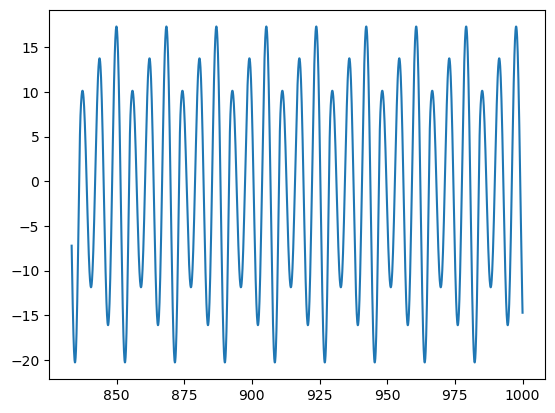

In [20]:
#generate time series
system = 'rossler'
dynamic_state = 'periodic'
t, solution = DSL.DynamicSystems(system, dynamic_state)
ts = solution[1]

plt.plot(t,ts)

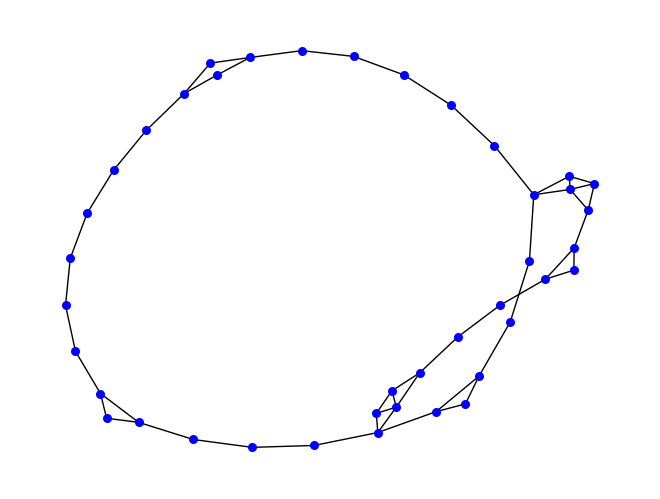

In [22]:
#Get appropriate dimension and delay parameters for permutations
tau = int(MsPE_tau(ts))
n = 5

#create adjacency matrix, this
A = ordinal_partition_graph(ts, n, tau)

#get networkx representation of network for plotting
G, pos = make_network(A, position_iterations = 2000, remove_deg_zero_nodes = True)

nx.draw(G, pos, with_labels=False, font_weight='bold', node_color='blue',
            width=1, font_size = 10, node_size = 30)

In [23]:
#create distance matrix and calculate persistence diagram
D, diagram = PH_network(A, method = 'unweighted', distance = 'shortest_path')
# print('1-D Persistent Homology (loops): \n', diagram[1])
drawNetworkExample(ts,G,diagram)

TypeError: PH_network() got an unexpected keyword argument 'method'

In [24]:
help(PH_network)

Help on function PH_network in module teaspoon.TDA.PHN:

PH_network(D, max_homology_dimension=1)
    This function calculates the persistent homology of the graph represented by the adjacency matrix A using a distance algorithm defined by user.
    
    Args:
        D (2-D array): Distance matrix between all node pairs.
    
    Other Parameters:
        max_homology_dimension (Optional[int]): maximum dimension of the homology.
    
    Returns:
        [list]: list of lists where ech list is a persistence diagram (standard ripser format).



### The same example but with a chaotic time series 

In [25]:
#generate time series
system = 'rossler'
dynamic_state = 'chaotic'
t, solution = DSL.DynamicSystems(system, dynamic_state)
ts = solution[1]

#Get appropriate dimension and delay parameters for permutations
tau = int(MsPE_tau(ts))
n = 5

#create adjacency matrix, this
A = ordinal_partition_graph(ts, n, tau)

#get networkx representation of network for plotting
G, pos = make_network(A, position_iterations = 2000, remove_deg_zero_nodes = True)

#create distance matrix and calculate persistence diagram
D, diagram = PH_network(A, method = 'unweighted', distance = 'shortest_path')
# print('1-D Persistent Homology (loops): \n', diagram[1])


TypeError: PH_network() got an unexpected keyword argument 'method'

In [26]:
drawNetworkExample(ts,G,diagram)

NameError: name 'diagram' is not defined

# Warning

Persistence diagrams can have multiplicity!

In [ ]:
# print('1-D Persistent Homology (loops): \n', diagram[1]) # Uncomment me!
drawThisDiagram(diagram)

# Distances between persistence diagrams 

In [ ]:
# Make three example point clouds 
r = 1
R = 2
P1 = makePtCloud.Annulus(N=200, r=r, R=R, seed=None) # teaspoon data generation
P2 = makePtCloud.Annulus(N=200, r=r, R=R, seed=None)
P2[:,1] += 6
P3 = DoubleAnnulus()
P3 *= 1.1
P3[:,0] += 6
P3[:,1] += 3

In [ ]:
# plt.figure(figsize = (15,5))
plt.scatter(P1[:,0],P1[:,1], label = 'P1')
plt.scatter(P2[:,0],P2[:,1], label = 'P2')
plt.scatter(P3[:,0],P3[:,1], label = 'P3')
plt.axis('equal')
plt.legend()

In [ ]:
# Compute their diagrams 
diagrams1 = ripser.ripser(P1)['dgms']
diagrams2 = ripser.ripser(P2)['dgms']
diagrams3 = ripser.ripser(P3)['dgms']

Draw.drawDgm(diagrams1[1])
Draw.drawDgm(diagrams2[1])
Draw.drawDgm(diagrams3[1])


### Bottleneck Distance 

In [ ]:
# Compute bottleneck distance using scikit-tda
distance_bottleneck, (matching, D) = persim.bottleneck(diagrams1[1], diagrams2[1], matching=True)
persim.visuals.bottleneck_matching(diagrams1[1], diagrams2[1], matching, D, labels=['Clean $H_1$', 'Noisy $H_1$'])
print('The bottleneck distance is', distance_bottleneck)
# print(matching)
# print(D)

In [ ]:
# Compute bottleneck of P1 and P3
distance_bottleneck, (matching, D) = persim.bottleneck(diagrams1[1], diagrams3[1], matching=True)
persim.visuals.bottleneck_matching(diagrams1[1], diagrams3[1], matching, D, labels=['Clean $H_1$', 'Noisy $H_1$'])
print('The bottleneck distance is', distance_bottleneck)

# But Liz, what should I do next? 



Ha I have no idea! But here are some next steps to read about/try.  Happy to discuss more during the small group session! 


- Different input data and/or filtrations
  - Something other than clique complexes
  - Directed complexes 
  - Image data 
- ML and statistics interfaces: featurizations 
  - [Persistence images](https://www.jmlr.org/papers/v18/16-337.html)
  - [Persistence landscapes](https://www.jmlr.org/papers/volume16/bubenik15a/bubenik15a.pdf)
  - [Template functions](https://arxiv.org/abs/1902.07190)
  - Lots and lots more......
  

  
- Other TDA signatures 
  - Reeb graphs
  - [Mapper graphs ](https://research.math.osu.edu/tgda/mapperPBG.pdf)
  - Merge trees
  - Contour trees 
  - Morse-Smale complexes


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:white;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-baqh{text-align:center;vertical-align:top}

</style>

# Thank you!!!

- Content adapted from tutorials by [Audun Myers](https://www.audunmyers.com/) and [Chris Tralie](http://www.ctralie.com/)
- Get connected: [WinCompTop](https://awmadvance.org/research-networks/wincomptop-women-in-computational-topology/)
- My survey papers:  [User's guide](https://learning-analytics.info/index.php/JLA/article/view/5196),    [Bio focus](https://anatomypubs.onlinelibrary.wiley.com/doi/full/10.1002/dvdy.175)

<table class="tg">

<tbody>
  <tr>
    <td class="tg-baqh">
        <img src = "https://evacenteno.com/wp-content/uploads/2015/08/icon-blue-email-294x300.png" alt = "email icon" style="width:30px;"/>
        <a href="mailto:muncheli@msu.edu">muncheli@msu.edu</a>
    </td>
    <td class="tg-baqh">
        <img src = "https://www.flaticon.com/svg/static/icons/svg/975/975645.svg" alt = "Website icon" style="width:30px;"/>
        <a href="http://elizabethmunch.com">elizabethmunch.com</a>
    </td>
    <td class="tg-baqh">
        <img src = "https://www.flaticon.com/svg/static/icons/svg/220/220233.svg" alt="Twitter icon"style="width:30px;"/>
        <a href="https://twitter.com/elizabethmunch">@elizabethmunch</a>
    </td>
    <td>
        <img src="https://www.nsf.gov/images/logos/NSF_4-Color_vector_Logo_thumb.jpg" alt="NSF Logo" style="width:80px">
      </td>
          <td>
        <img src="https://cmse.msu.edu/sites/_cmse/assets/Image/image002.jpg" alt="MSU CMSE Logo" style="width:80px">
      </td>
       
  </tr>
</tbody>
</table>


